## Observations and Insights            
### Jake Burns

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as sts
import random
from scipy.stats import sem
import sklearn.datasets as dta
from scipy.stats import linregress

In [2]:
# Set the seed so our data is reproducible
random.seed(7)

In [3]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [4]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [5]:
#mouse_metadata preview
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [6]:
#study results preview
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [7]:
# Combine the data into a single dataset
complete_mouse_study_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

In [8]:
#Preview comnined dataframe
complete_mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# #testing

# complete_mouse_study_df.groupby(["Mouse ID"]).agg({
    
# })


In [10]:
#check number of mice is starting at 249
complete_mouse_study_df.groupby(["Mouse ID"]).count()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [11]:
#groupby MouseID and Timepoint to capture duplicate data points to eliminate duplicate values

# dups= complete_mouse_study_df.groupby(["Mouse ID", "Timepoint"]).count()

# # #testing .agg

# # complete_mouse_study_df.groupby(["Mouse ID", "Timepoint"]).agg({
    
# # })
# dups


In [12]:
# find number of duplicate Mice data using .duplicated

# print(complete_mouse_study_df.duplicated(subset= ["Mouse ID"]))
#comment out after viewing list

#include .sum into coding to determine number of duplicate IDs

print(complete_mouse_study_df.duplicated(subset= ["Mouse ID", "Timepoint"], keep= False).sum())

10


In [13]:
#Remove duplicate rows and create clean dataframe with only unique values
#drop_duplicates drops duplicate rows

#keep = false ensures that we drop all duplicate rows, even the "first/original" duplicate row read



Dup_mouse_ID_list= complete_mouse_study_df[complete_mouse_study_df.duplicated(subset= ["Mouse ID", "Timepoint"], keep= False)]

Dup_mouse_ID_list
#up_mouse_ID_list= test1["Mouse ID"]
#Dup_mouse_ID_list

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [14]:
#groupby mouseid to find diff dup ids  (even though it's only one in this case)
Dup_mouse_ID= Dup_mouse_ID_list.groupby(["Mouse ID"]).count()
Dup_mouse_ID

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,10,10,10,10,10,10,10


In [15]:
#Now call full df where Mouse ID does not equal ID from Duplicate findings

clean_complete_df = complete_mouse_study_df[
    (complete_mouse_study_df["Mouse ID"] != 'g989')]



clean_complete_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
#checking to see number of mice after cleaning
clean_complete_df.groupby(["Mouse ID"]).count()


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [17]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [18]:
# Optional: Get all the data for the duplicate mouse ID. 



In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [20]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_mean_numpy = np.mean(clean_complete_df["Tumor Volume (mm3)"])
print(f"The mean tumor volume is {tumor_mean_numpy}")


tumor_median_numpy = np.median(clean_complete_df["Tumor Volume (mm3)"])
print(f"The median tumor volume is {tumor_median_numpy}")


tumor_variance_numpy = np.var(clean_complete_df["Tumor Volume (mm3)"])
print(f"The variance of the tumor volume data is {tumor_variance_numpy}")

tumor_std_scipy = sts.tstd(clean_complete_df["Tumor Volume (mm3)"])
print(f"The std for the tumor volume data is {tumor_std_scipy}")

#SEM (Standard Error of the Mean)       sample size of 50
sample= clean_complete_df.sample(50)
# tumor_sem = sts.tstd(clean_complete_df["Tumor Volume (mm3)"])

samp_variable= sample["Tumor Volume (mm3)"]

print(f"The SEM value for the tumor volume data is {sem(samp_variable)}")

The mean tumor volume is 50.43529323225532
The median tumor volume is 48.933453655
The variance of the tumor volume data is 79.42063964177238
The std for the tumor volume data is 8.91419694339166
The SEM value for the tumor volume data is 1.2520399766237362


In [22]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


drug_regimen_df = clean_complete_df.groupby(['Drug Regimen']).agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})

drug_regimen_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [24]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#create groupby counting timepints (measurements taken) for each drug regimen
tot_measurements_df = clean_complete_df.groupby(['Drug Regimen']).count()['Timepoint']
tot_measurements_df

#tot_measure_2 = tot_measurements.groupby()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

##### ^ Above list created for y values ^

##### Below list created for x values

In [25]:
#create x axis list for different Drug Regimens

x_drug_regimen= clean_complete_df['Drug Regimen'].unique()

##### Bar Charts Observing Number of Measurements Taken For Drug Regimens on Mice (DF & Matplotlib Mathod):

Text(0, 0.5, '# of Measurements')

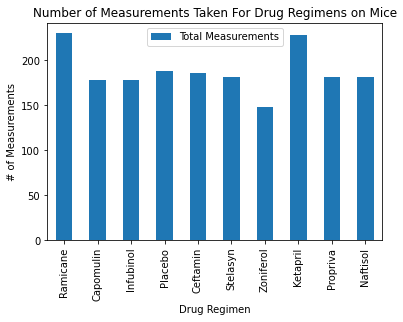

In [26]:
#Create bar graph

df = pd.DataFrame({'Drug Regimen':x_drug_regimen, 'Total Measurements':tot_measurements_df})
ax = df.plot.bar(x='Drug Regimen', y='Total Measurements', rot=90)



plt.title("Number of Measurements Taken For Drug Regimens on Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Measurements")

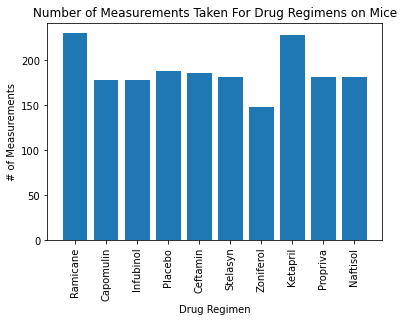

In [27]:
# Create a list indicating where to write x labels and set figure size to adjust for space
#matplot bar
fig_bar = plt.figure()
plt.bar(x_drug_regimen, tot_measurements_df)
plt.xticks(rotation="vertical")

# Set x and y limits
# plt.xlim(-0.25, len(x_axis))
# plt.ylim(0, max(rain_df["Inches"])+10)

# Set a Title and labels
plt.title("Number of Measurements Taken For Drug Regimens on Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Measurements")

plt.show()

In [28]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



# clean graphs and make identical

In [29]:
sex_count_df= clean_complete_df['Sex'].value_counts()
sex_count_df

Male      958
Female    922
Name: Sex, dtype: int64

In [30]:
male_mice_count= sex_count_df[0]
#male_mice_count

In [31]:
female_mice_count= sex_count_df[1]
#female_mice_count

## edit graph to look good and add details

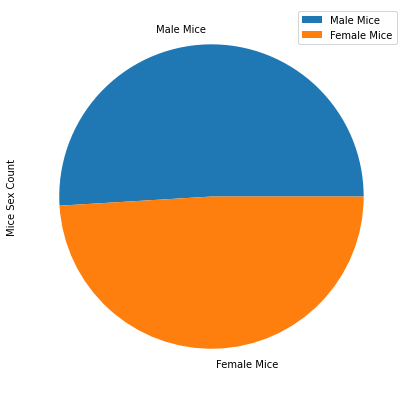

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_df = pd.DataFrame({"Mice Sex Count": [male_mice_count, female_mice_count],
                   'radius': [2439.7, 6051.8]},
                  index=['Male Mice', 'Female Mice'])
pie_plot = pie_df.plot.pie(y='Mice Sex Count', figsize=(7, 7))

(-1.1101410553673794,
 1.1272585351526159,
 -1.1104295916068467,
 1.1228276690280699)

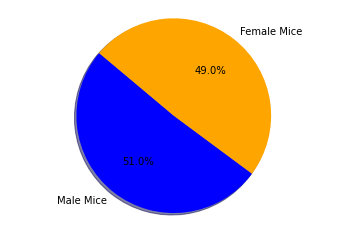

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Male Mice", "Female Mice"]

# The values of each section of the pie chart
sizes = [male_mice_count, female_mice_count]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Tells matplotlib to seperate the "Humans" section from the others
#explode = (0.1, 0, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

## edit graph to look good and add details

## Quartiles, Outliers and Boxplots

In [34]:
#reference
clean_complete_df.tail(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1873,z795,Naftisol,Female,13,29,0,45.000000,0
1874,z795,Naftisol,Female,13,29,5,46.833475,0
1875,z795,Naftisol,Female,13,29,10,48.030804,0
1876,z795,Naftisol,Female,13,29,15,49.368132,1
1877,z795,Naftisol,Female,13,29,20,53.280657,1
1878,z795,Naftisol,Female,13,29,25,57.947100,2
1879,z795,Naftisol,Female,13,29,30,59.789636,2
1880,z795,Naftisol,Female,13,29,35,60.435654,2
1881,z795,Naftisol,Female,13,29,40,62.376639,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [36]:
# Start by getting the last (greatest) timepoint for each mouse

# final_tumor_timepoint = clean_complete_df.groupby(['Mouse ID']).agg({
#     'Timepoint': ['max'],
# })


# # final_tumor_timepoint = clean_complete_df.groupby(['Mouse ID', 'Timepoint']).max()


# final_tumor_timepoint

In [37]:
# #drop all rows that aren't the four drugs we want to observe

# mouse_last_timepoint= final_tumor_volume.drop([3, 4, 5, 6, 8, 9])
# mouse_last_timepoint

In [38]:
# Capomulin_lis= final_tumor_volume[final_tumor_volume['Drug Regimen'].str.match('Capomulin')]
# Ramicane_lis= final_tumor_volume[final_tumor_volume['Drug Regimen'].str.match('Ramicane')]
# Infubinol_lis= final_tumor_volume[final_tumor_volume['Drug Regimen'].str.match('Infubinol')]
# Ceftamin_lis= final_tumor_volume[final_tumor_volume['Drug Regimen'].str.match('Ceftamin')]

# Capomulin_lis
# # print(Ramicane_lis)
# # print(Infubinol_lis)
# # print(Ceftamin_lis)

In [39]:
# four_treatments1= Capomulin_lis.add(Ramicane_lis, fill_value= 0) 
# four_treatments2= Infubinol_lis.add(Ceftamin_lis, fill_value= 0)

In [40]:
clean_complete_df.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1


In [41]:
# xy= clean_complete_df.groupby('Mouse ID').max()

# xy= clean_complete_df.groupby(['Mouse ID']).agg({
#     'Timepoint': ['max']
# })


#include as_index= false so the output is a df with iteratable columns
xy= clean_complete_df.groupby(['Drug Regimen','Mouse ID'], as_index=False).agg({
    'Timepoint': ['max'],
    'Tumor Volume (mm3)': ['last']
})


# xy= clean_complete_df.groupby(['Drug Regimen','Mouse ID']).agg({
#     'Timepoint': ['max'],
#     'Tumor Volume (mm3)': ['last']
# })





xy

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
,,,max,last
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
243,Zoniferol,q633,45,70.827796
244,Zoniferol,s337,45,62.109651
245,Zoniferol,w140,5,47.717952


In [42]:
#fix column indexing

#rename columns
xy.columns=xy.columns.map('_'.join)
xy.head()

,Drug Regimen_,Mouse ID_,Timepoint_max,Tumor Volume (mm3)_last
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220


In [43]:
# trying to only return the 4 drug regimens we want:
#create empty list to be filled later

Capomulin_list= []
Ramicane_list= []
Infubinol_list= []
Ceftamin_list= []

In [44]:
# use a for loop with the .append command to add to lists when appropriate

for drug in range(len(xy)):
    if (xy.loc[drug, 'Drug Regimen_'] == 'Capomulin'):
        Addition = xy.loc[drug, 'Tumor Volume (mm3)_last']
        Capomulin_list.append(Addition)
        
    elif (xy.loc[drug, 'Drug Regimen_'] == 'Ramicane'):
        Addition = xy.loc[drug, 'Tumor Volume (mm3)_last']
        Ramicane_list.append(Addition)
        
    elif (xy.loc[drug, 'Drug Regimen_'] == 'Infubinol'):
        Addition = xy.loc[drug, 'Tumor Volume (mm3)_last']
        Infubinol_list.append(Addition)
        
    elif (xy.loc[drug, 'Drug Regimen_'] == 'Ceftamin'):
        Addition = xy.loc[drug, 'Tumor Volume (mm3)_last']
        Ceftamin_list.append(Addition)
        
    else:
        pass


#Tumor Volume (mm3)
    
# for drug in range(len(xy):
#                   if (xy.loc[drug, 'Drug Regimen'] == 'Capomulin'):
#                       Addition= xy.loc[drug, 'Tumor Volume (mm3)'])
#                       Capomulin_list.append(Addition)
#                   else:
#             pass
    

#for i in range(len(df)) :
#  print(df.loc[i, "Name"], df.loc[i, "Age"])


In [45]:
Capomulin_list

[38.98287774,
 38.93963263,
 30.48598484,
 37.07402422,
 40.1592203,
 47.68596303,
 37.31184577,
 38.125164399999996,
 38.75326548,
 41.48300765,
 38.84687569,
 28.43096411,
 33.32909778,
 46.53920617,
 32.37735684,
 41.58152074,
 23.34359787,
 40.72857787,
 34.45529799,
 31.02392294,
 40.65812366,
 39.95234669,
 36.04104736,
 28.48403281,
 31.896238399999998]

In [46]:
#trying to make the list iteratable

#pd.series allows the object to return as an array we can find quantiles of

Capomulin_list_pd = pd.Series(Capomulin_list)
Capomulin_list_pd

0     38.982878
1     38.939633
2     30.485985
3     37.074024
4     40.159220
5     47.685963
6     37.311846
7     38.125164
8     38.753265
9     41.483008
10    38.846876
11    28.430964
12    33.329098
13    46.539206
14    32.377357
15    41.581521
16    23.343598
17    40.728578
18    34.455298
19    31.023923
20    40.658124
21    39.952347
22    36.041047
23    28.484033
24    31.896238
dtype: float64

In [47]:
Ramicane_list

[38.407618299999996,
 43.04754260000001,
 38.81036633,
 32.97852192,
 38.34200823,
 33.39765251,
 37.31123552,
 40.65900627,
 29.12847181,
 33.56240217,
 36.37451039,
 31.56046955,
 36.13485243,
 22.05012627,
 30.56462509,
 31.09533505,
 45.22086888,
 36.56165229,
 37.22565033,
 43.41938077,
 30.27623175,
 40.66771292,
 43.16637266,
 44.18345092,
 30.63869575]

In [48]:
#pd.series to make iteratable
Ramicane_list_pd = pd.Series(Ramicane_list)
Ramicane_list_pd

0     38.407618
1     43.047543
2     38.810366
3     32.978522
4     38.342008
5     33.397653
6     37.311236
7     40.659006
8     29.128472
9     33.562402
10    36.374510
11    31.560470
12    36.134852
13    22.050126
14    30.564625
15    31.095335
16    45.220869
17    36.561652
18    37.225650
19    43.419381
20    30.276232
21    40.667713
22    43.166373
23    44.183451
24    30.638696
dtype: float64

In [49]:
Infubinol_list

[67.97341878,
 65.52574285,
 57.03186187,
 66.08306589,
 72.2267309,
 36.321345799999996,
 60.96971133,
 62.43540402,
 60.91876652,
 67.28962147,
 66.19691151,
 62.11727887,
 47.01036401,
 60.16518046,
 55.62942846,
 45.69933088,
 54.65654872,
 55.65068132,
 46.25011212,
 54.04860769,
 51.54243058,
 50.00513807,
 58.26844248,
 67.68556862,
 62.75445141]

In [50]:
#pd.series to make iteratable
Infubinol_list_pd = pd.Series(Infubinol_list)
Infubinol_list_pd

0     67.973419
1     65.525743
2     57.031862
3     66.083066
4     72.226731
5     36.321346
6     60.969711
7     62.435404
8     60.918767
9     67.289621
10    66.196912
11    62.117279
12    47.010364
13    60.165180
14    55.629428
15    45.699331
16    54.656549
17    55.650681
18    46.250112
19    54.048608
20    51.542431
21    50.005138
22    58.268442
23    67.685569
24    62.754451
dtype: float64

In [51]:
Ceftamin_list

[62.99935619,
 45.0,
 56.05774909,
 55.74282869,
 48.72207785,
 47.784681799999994,
 61.84902336,
 68.92318457,
 67.74866174,
 57.91838132,
 46.78453491,
 59.85195552,
 64.29983003,
 59.74190064,
 61.43389223,
 64.19234114,
 45.0,
 52.92534846,
 45.0,
 67.52748237,
 45.0,
 64.63494887,
 61.38666032,
 68.59474498,
 64.72983655]

In [52]:
#pd.series to make iteratable
Ceftamin_list_pd = pd.Series(Ceftamin_list)
Ceftamin_list_pd

0     62.999356
1     45.000000
2     56.057749
3     55.742829
4     48.722078
5     47.784682
6     61.849023
7     68.923185
8     67.748662
9     57.918381
10    46.784535
11    59.851956
12    64.299830
13    59.741901
14    61.433892
15    64.192341
16    45.000000
17    52.925348
18    45.000000
19    67.527482
20    45.000000
21    64.634949
22    61.386660
23    68.594745
24    64.729837
dtype: float64

##### Findind IQR and Statistical Outliers of Capomulin

In [53]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Do first for Capomulin

quartiles_Capomulin = Capomulin_list_pd.quantile([.25,.5,.75])
lowerq_cap = quartiles_Capomulin[0.25]
upperq_cap = quartiles_Capomulin[0.75]
iqr_cap = upperq_cap-lowerq_cap

#print results
print(f"The lower quartile of Capomulin is: {lowerq_cap}")
print(f"The upper quartile of Capomulin is: {upperq_cap}")
print(f"The interquartile range of Capomulin is: {iqr_cap}")
print(f"The the median of Capomulin is: {quartiles_Capomulin[0.5]} ")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 


In [54]:
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)
print(f"Values below {lower_bound_cap} could be outliers.")
print(f"Values above {upper_bound_cap} could be outliers.")


   
    #Capomulin_list_pd.loc
outlier_cap = Capomulin_list_pd.loc[(Capomulin_list_pd < lower_bound_cap) | (Capomulin_list_pd > upper_bound_cap)]
outlier_cap

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


Series([], dtype: float64)

##### Finding IQR and Statistical Outliers of Ramicane

In [55]:
quartiles_Ramicane = Ramicane_list_pd.quantile([.25,.5,.75])
lowerq_ram = quartiles_Ramicane[0.25]
upperq_ram = quartiles_Ramicane[0.75]
iqr_ram = upperq_ram-lowerq_ram

#print results
print(f"The lower quartile of Ramicane is: {lowerq_ram}")
print(f"The upper quartile of Ramicane is: {upperq_ram}")
print(f"The interquartile range of Ramicane is: {iqr_ram}")
print(f"The the median of Ramicane is: {quartiles_Ramicane[0.5]} ")

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 


In [56]:
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)
print(f"Values below {lower_bound_ram} could be outliers.")
print(f"Values above {upper_bound_ram} could be outliers.")

   
outlier_ram = Ramicane_list_pd.loc[(Ramicane_list_pd < lower_bound_ram) | (Ramicane_list_pd > upper_bound_ram)]
outlier_ram

Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


Series([], dtype: float64)

##### Findind IQR and Statistical Outliers of Infubinol

In [57]:
quartiles_Infubinol = Infubinol_list_pd.quantile([.25,.5,.75])
lowerq_inf = quartiles_Infubinol[0.25]
upperq_inf = quartiles_Infubinol[0.75]
iqr_inf = upperq_inf-lowerq_inf

#print results
print(f"The lower quartile of Infubinol is: {lowerq_inf}")
print(f"The upper quartile of Infubinol is: {upperq_inf}")
print(f"The interquartile range of Infubinol is: {iqr_inf}")
print(f"The the median of Infubinol is: {quartiles_Infubinol[0.5]} ")

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 


In [58]:
lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)
print(f"Values below {lower_bound_inf} could be outliers.")
print(f"Values above {upper_bound_inf} could be outliers.")

   
outlier_inf = Infubinol_list_pd.loc[(Infubinol_list_pd < lower_bound_inf) | (Infubinol_list_pd > upper_bound_inf)]
outlier_inf

Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


5    36.321346
dtype: float64

##### Findind IQR and Statistical Outliers of Ceftamin

In [59]:
quartiles_Ceftamin = Ceftamin_list_pd.quantile([.25,.5,.75])
lowerq_cef = quartiles_Ceftamin[0.25]
upperq_cef = quartiles_Ceftamin[0.75]
iqr_cef = upperq_cef-lowerq_cef

#print results
print(f"The lower quartile of Ceftamin is: {lowerq_cef}")
print(f"The upper quartile of Ceftamin is: {upperq_cef}")
print(f"The interquartile range of Ceftamin is: {iqr_cef}")
print(f"The the median of Ceftamin is: {quartiles_Ceftamin[0.5]} ")

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The the median of Ceftamin is: 59.85195552 


In [60]:
lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)
print(f"Values below {lower_bound_cef} could be outliers.")
print(f"Values above {upper_bound_cef} could be outliers.")

   
outlier_cef = Ceftamin_list_pd.loc[(Ceftamin_list_pd < lower_bound_cef) | (Ceftamin_list_pd > upper_bound_cef)]
outlier_cef

Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


Series([], dtype: float64)

##### Generate boxplots to compare drug regimens

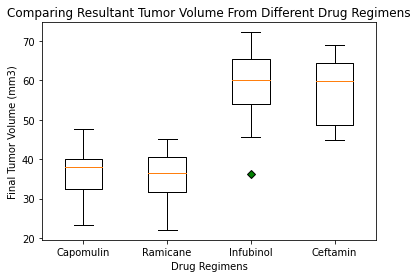

In [61]:
#Boxplots on one figure to compare on same axis

#use Matplotlib reference to clean data and "make pretty"

green_diamond = dict(markerfacecolor='g', marker='D')

figure_data = [Capomulin_list_pd, Ramicane_list_pd, Infubinol_list_pd, Ceftamin_list_pd]
fig1, ax1 = plt.subplots()
ax1.set_title('Comparing Resultant Tumor Volume From Different Drug Regimens')
ax1.set_xlabel('Drug Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')

ax1.boxplot(figure_data, flierprops=green_diamond)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])


plt.show()

In [62]:
    
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [63]:
#Verifying data properly represents original raw data below:

In [64]:
# xy.head(3)

In [65]:
# xy.loc[xy['Drug Regimen_']  == 'Ceftamin', ['Drug Regimen_','Mouse ID_','Timepoint_max', 'Tumor Volume (mm3)_last']]

In [66]:
# clean_complete_df.head(3)

In [67]:
# clean_complete_df.loc[clean_complete_df['Mouse ID']  == 'b447', ['Drug Regimen','Mouse ID','Timepoint', 'Tumor Volume (mm3)']]



In [68]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [69]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [70]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [71]:
clean_complete_df.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1


In [72]:
#locate mouse treated by Capomulin

#use .loc to find specific requirements

clean_complete_df.loc[clean_complete_df['Drug Regimen']  == 'Capomulin', ['Drug Regimen','Mouse ID','Timepoint', 'Tumor Volume (mm3)']]

#After running, choose mouse id to observe. Then comment out code above to specify
#s185

s185_volume_v_timepoint = clean_complete_df.loc[clean_complete_df['Mouse ID']  == 's185', ['Drug Regimen','Mouse ID','Timepoint', 'Tumor Volume (mm3)']]
s185_volume_v_timepoint

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
10,Capomulin,s185,0,45.000000
11,Capomulin,s185,5,43.878496
12,Capomulin,s185,10,37.614948
13,Capomulin,s185,15,38.177232
14,Capomulin,s185,20,36.866876
15,Capomulin,s185,25,33.949940
16,Capomulin,s185,30,32.959671
17,Capomulin,s185,35,28.328531
18,Capomulin,s185,40,25.472143
19,Capomulin,s185,45,23.343598


###### Capomulin Individual Result Observing Tumor Volume Over Time (Line Graph)

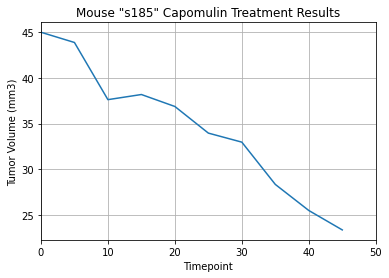

In [73]:
#plot line plot
fig2, ax2 = plt.subplots()

x_1 = s185_volume_v_timepoint['Timepoint']
y_1 = s185_volume_v_timepoint['Tumor Volume (mm3)']
ax2.plot(x_1, y_1, scalex=True)

ax2.set_xlabel('Timepoint')
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.set_title('Mouse "s185" Capomulin Treatment Results')

# Set your x and y limits
plt.xlim(0, (x_1.max()+5))
# plt.ylim(0, (y_1.max()+5))

# Set a grid on the plot
plt.grid()

plt.show()

In [74]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


In [75]:
clean_complete_df.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1


In [76]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#use groupby to get grouped table of weight of mouse and avg Tumor Volume

s185_v_w= clean_complete_df.groupby(['Drug Regimen','Mouse ID'], as_index=False).agg({
    'Weight (g)': ['mean'],
    'Tumor Volume (mm3)': ['mean']
})

s185_v_w_grouped_df = s185_v_w.loc[s185_v_w['Drug Regimen'] == 'Capomulin']
s185_v_w_grouped_df

,Drug Regimen,Mouse ID,Weight (g),Tumor Volume (mm3)
,,,mean,mean
0,Capomulin,b128,22,41.963636
1,Capomulin,b742,21,40.083699
2,Capomulin,f966,17,36.505973
3,Capomulin,g288,19,41.990097
4,Capomulin,g316,22,44.613344
5,Capomulin,i557,24,44.805810
6,Capomulin,i738,20,39.141053
7,Capomulin,j119,23,44.465236
8,Capomulin,j246,21,43.216925


In [77]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


#use .loc to find specific requirements


# s185_volume_v_weight = clean_complete_df.loc[clean_complete_df['Drug Regimen']  == 'Capomulin', ['Drug Regimen','Mouse ID','Weight (g)', 'Timepoint', 'Tumor Volume (mm3)']]
# s185_volume_v_weight

In [78]:
#create variable for lists

x_weight= s185_v_w_grouped_df['Weight (g)']
y_volume= s185_v_w_grouped_df['Tumor Volume (mm3)']

In [79]:
#break down list in order for pearsonr to read int list

x_list_w= x_weight['mean']

In [80]:
y_list_v= y_volume['mean']

In [81]:
linregress(x_list_w, y_list_v)

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.12754359033201337)

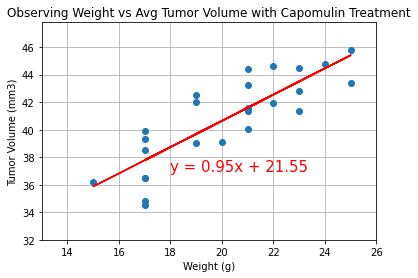

In [82]:
#plot line plot
fig3, ax3 = plt.subplots()

x_weight= s185_v_w_grouped_df['Weight (g)']
y_volume= s185_v_w_grouped_df['Tumor Volume (mm3)']

# unpacking 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_list_w, y_list_v)

# y = mx + b
regress_values = x_weight * slope + intercept

line_regress_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


ax3.plot(x_weight, y_volume, 'o')

#lin regress line

line_regress_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_regress_eq,(18,37),fontsize=15,color="red")
plt.plot(x_weight,regress_values,"r-")

ax3.set_xlabel('Weight (g)')
ax3.set_ylabel('Tumor Volume (mm3)')
ax3.set_title('Observing Weight vs Avg Tumor Volume with Capomulin Treatment')

#limits
plt.xlim(13, (x_weight.max()+1).item())
plt.ylim(32, (y_volume.max()+2).item())

# Set a grid on the plot
plt.grid()


plt.show()


In [83]:
line_regress_eq

'y = 0.95x + 21.55'

In [84]:
x_weight.max()

mean    25
dtype: int64

## Correlation and Regression

In [85]:
#break down list in order for pearsonr to read int list

#x_list_w= x_weight['mean']

In [86]:
#y_list_v= y_volume['mean']

In [87]:
# Calculate the correlation coefficient and linear regression model 

correlation= round(st.pearsonr(x_list_w, y_list_v)[0],2)
#correlation
print(f"The correlation coefficient between weight and tumor volume for the Capomulin drug regimen is {correlation}")

The correlation coefficient between weight and tumor volume for the Capomulin drug regimen is 0.84


In [89]:
#Add Linear Regression line to scatter plot